# Lambda School, Intro to Data Science, Day 7 — More Regression!

## Assignment

### 1. Experiment with Nearest Neighbor parameter

Using the same 10 training data points from the lesson, train a `KNeighborsRegressor` model with `n_neighbors=1`.

Use both `carat` and `cut` features.

Calculate the mean absolute error on the training data and on the test data.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

columns = ['carat', 'cut', 'price']

train = pd.DataFrame(columns = columns, 
        data  = [[0.3, 'Ideal',      422],
                [0.31, 'Ideal',      489],
                [0.42, 'Premium',    737],
                [0.50, 'Ideal',     1415],
                [0.51, 'Premium',   1177],
                [0.70, 'Fair',      1865],
                [0.73, 'Fair',      2351],
                [1.01, 'Good',      3768],
                [1.18, 'Very Good', 3965],
                [1.18, 'Ideal',     4838]])

test  = pd.DataFrame(columns = columns, 
        data = [[0.30, 'Ideal',      432],
                [0.34, 'Ideal',      687],
                [0.37, 'Premium',   1124],
                [0.40, 'Good',       720],
                [0.51, 'Ideal',     1397],
                [0.51, 'Very Good', 1284],
                [0.59, 'Ideal',     1437],
                [0.70, 'Ideal',     3419],
                [0.90, 'Premium',   3484],
                [0.90, 'Fair',      2964]])

cut_ranks = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
train.cut = train.cut.map(cut_ranks)
test.cut = test.cut.map(cut_ranks)

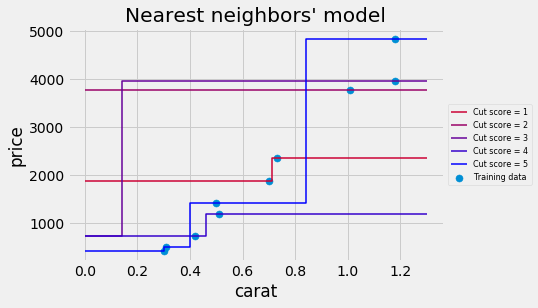

In [682]:
from sklearn.neighbors import KNeighborsRegressor

# Scatterplot
plt.style.use("fivethirtyeight")
train.plot.scatter(x = "carat", y = "price", s = 50, \
                   label = "Training data");
plt.title("Nearest neighbors' model")
# Sample variables & points
features = ["carat", "cut"]
target = "price"
# Nearest neighbors' model fitting.
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(1)
model.fit(train[features], train[target])
# Nearest neighbors' model prediction USING BOTH VARIABLES.
carats = [c/100 for c in range(131)]
cuts = list(cut_ranks.values())
for cut in cuts:
  data = []
  for carat in carats:
    data.append([carat, cut])
  predictions = model.predict(data)
  plt.step(carats, predictions, linewidth = 1.5, \
         color = [cuts[-1]/5 - cut/5, 0, cut/5], \
         label = "Cut score = %s" % cut)
  
plt.legend(fontsize = 8, loc = 'center left', bbox_to_anchor = (1, 0.5))

In [683]:
from sklearn.metrics import mean_absolute_error

def mean_abs_error(model):
  error = []
  # Calculate mean absolute error on the training data.
  # (average distance between line and blue dots)
  y_true = train[target]
  y_pred = model.predict(train[features])
  error.append(mean_absolute_error(y_true, y_pred))
  # Calculate mean absolute error on the testing data.
  # (average distance between line and blue dots)
  y_true = test[target]
  y_pred = model.predict(test[features])
  error.append(mean_absolute_error(y_true, y_pred))
  # Output: both error rates.
  return(error)

train_error1, test_error1 = mean_abs_error(model)

# Results
print("The mean absolute error on training data "  + \
      "will always be %s because\n" % train_error1 + \
      "it just aims to one single point towards "  + \
      "which to minimize distance.\n")
print("The mean absolute error on data for testing " + \
      "is %0.2f." % test_error1)

The mean absolute error on training data will always be 0.0 because
it just aims to one single point towards which to minimize distance.

The mean absolute error on data for testing is 1128.80.


How does the train error and test error compare to the previous `KNeighborsRegressor` model from the lesson? (The previous model used `n_neighbors=2` and only the `carat` feature.)

Is this new model overfitting or underfitting? Why do you think this is happening here? 



Underfitting. Though it crosses every training point, it is quite inaccurate for two reasons:
1.   It doesn't "regress" anything. It just implies that every piece of data that is near one training point, is equal to it. That assumption is useless.
2.   Using two features as training variables adds an extra "dimension" of uncertainty. See that for each cut value, we've got 3 points at the most, to draw the regression "staircase". That would be better seen in a 3D plot (point cloud, in space). Much more data would then be needed to generate trustworthy model of value prediction. 



### 2. More data, two features, linear regression

Use the following code to load data for diamonds under $5,000, and split the data into train and test sets. The training data has almost 30,000 rows, and the test data has almost 10,000 rows.

In [684]:
import seaborn as sns

df = sns.load_dataset('diamonds')
df = df[df.price < 5000]
train, test = train_test_split(df.copy(), random_state=0)
train.shape, test.shape

# Set cut labels to cut score numbers.
train.cut = train.cut.map(cut_ranks)
test.cut = test.cut.map(cut_ranks)
# Preview columns.
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
43601,0.31,3,E,SI1,61.2,58.0,507,4.34,4.38,2.67
52706,0.74,1,H,VS2,66.1,61.0,2553,5.60,5.57,3.69
1986,0.81,3,G,SI1,62.3,59.0,3095,5.93,5.98,3.71
48617,0.70,1,G,SI2,61.5,66.0,1999,5.55,5.60,3.43
10947,0.87,5,G,VS2,61.8,56.0,4899,6.11,6.13,3.78


Then, train a Linear Regression model with the `carat` and `cut` features. Calculate the mean absolute error on the training data and on the test data.

Text(0.52, 1000, 'Sample diamond')

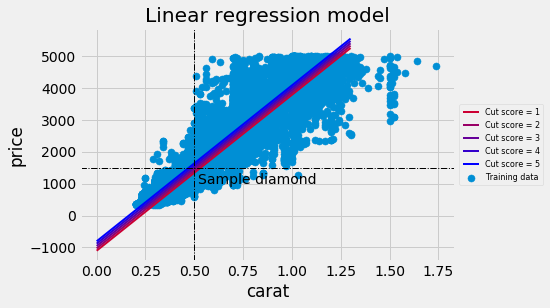

In [685]:
# Scatterplot
train.plot.scatter(x = "carat", y = "price", s = 50, \
                   label = "Training data");
plt.title("Linear regression model")
# Sample variables & points
features = ["carat", "cut"]
target = "price"
# Linear regression model fitting.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
model.fit(train[features], train[target])
# Linear regression model prediction USING BOTH VARIABLES.
carats = [c/100 for c in range(131)]
cuts = list(cut_ranks.values())
for cut in cuts:
  data = []
  for carat in carats:
    data.append([carat, cut])
  predictions = model.predict(data)
  plt.plot(carats, predictions, linewidth = 2, \
         color = [cuts[-1]/5 - cut/5, 0, cut/5], \
         label = "Cut score = %s" % cut)
  
plt.legend(fontsize = 8, loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.axvline(1/2, color = 'k', linewidth = 1, linestyle = "-.")
plt.axhline(1489.46, color = 'k', linewidth = 1, linestyle = "-.")
plt.text(x = 0.52, y = 1000, s = "Sample diamond")

***Note: by looking at this, we could say that price is (almost?) 100% linearly dependent of cut quality (coefficient of correlation = 1?)***

In [686]:
train_error2, test_error2 = mean_abs_error(model) # With def from former task.

# Results
print("The mean absolute error is %0.2f " % train_error2 + \
      "on data for training.")
print("The mean absolute error is %0.2f " % test_error2 + \
      "on data for testing.")
if abs(train_error2 - test_error2)/train_error < 0.05:
  print("Pretty similar, aren't them?")

The mean absolute error is 309.47 on data for training.
The mean absolute error is 309.52 on data for testing.
Pretty similar, aren't them?


Use this model to predict the price of a half carat diamond with "very good" cut

In [687]:
data = [[1/2, cut_ranks["Very Good"]]]
pred = model.predict(data)
print("The price of said diamond would be around %0.2f." % pred)
print("(See 'sample diamond' in the graph above)")

The price of said diamond would be around 1489.46.
(See 'sample diamond' in the graph above)


### 3. More data, more features, any model

You choose what features and model type to use! Try to get a better mean absolute error on the test set than your model from the last question.

Refer to [this documentation](https://ggplot2.tidyverse.org/reference/diamonds.html) for more explanation of the features.

Besides `cut`, there are two more ordinal features, which you'd need to encode as numbers if you want to use in your model:

In [688]:
train.describe(include = ['object'])

,color,clarity
count,29409,29409
unique,7,8
top,E,SI1
freq,6090,6948


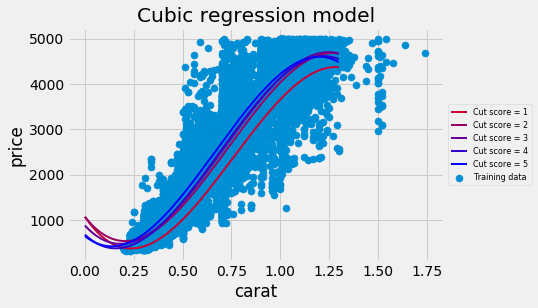

In [689]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
# Scatterplot
train.plot.scatter(x = "carat", y = "price", s = 50, \
                   label = "Training data");
plt.title("Cubic regression model")
# Sample variables & points
features = ["carat", "cut"]
target = "price"
# Cubic regression model fitting.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = make_pipeline(PolynomialFeatures(degree = 3), LinearRegression())
model.fit(train[features], train[target])
# Cubic regression model prediction USING BOTH VARIABLES.
carats = [c/100 for c in range(131)]
cuts = list(cut_ranks.values())
for cut in cuts:
  data = []
  for carat in carats:
    data.append([carat, cut])
  predictions = model.predict(data)
  plt.plot(carats, predictions, linewidth = 2, \
         color = [cuts[-1]/5 - cut/5, 0, cut/5], \
         label = "Cut score = %s" % cut)
  
plt.legend(fontsize = 8, loc = 'center left', bbox_to_anchor = (1, 0.5))

In [690]:
train_error3, test_error3 = mean_abs_error(model) # With def from former task.

# Results
print("The mean absolute error is %0.2f " % train_error3 + \
      "on data for training.")
print("The mean absolute error is %0.2f " % test_error3 + \
      "on data for testing.")
if train_error3 < train_error2:
  print("Managed to improve a little bit!")

The mean absolute error is 284.60 on data for training.
The mean absolute error is 284.78 on data for testing.
Managed to improve a little bit!
